In [1]:
import re
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

import urllib.request
import nltk.data 
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from gensim.models import word2vec
from string import punctuation
from sklearn.decomposition import PCA
import csv

unable to import 'smart_open.gcs', disabling that module


In [2]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [3]:
from collections import Counter

In [4]:
with open('office_corpus.csv', 'r', encoding='utf-8', newline='', errors='ignore') as f:
    reader = csv.DictReader(f)
    rows = list(reader)
data = pd.DataFrame(rows)

In [5]:
data

,SPEAKER,UTTERANCE,EPISODE_NAME
0,Michael,All right Jim. Your quarterlies look very goo...,Season 1 Episode 01
1,Jim,"Oh, I told you. I couldn't close it. So...",Season 1 Episode 01
2,Michael,So you've come to the master for guidance? Is...,Season 1 Episode 01
3,Jim,"Actually, you called me in here, but yeah.",Season 1 Episode 01
4,Michael,"All right. Well, let me show you how it's done.",Season 1 Episode 01
...,...,...,...
60036,Creed,It all seems so very arbitrary. I applied for...,Season 9 Episode 23
60037,Meredith,I just feel lucky that I got a chance to shar...,Season 9 Episode 23
60038,Phyllis,I’m happy that this was all filmed so I can r...,Season 9 Episode 23
60039,Jim,I sold paper at this company for 12 years. My...,Season 9 Episode 23


In [6]:
speakers = list(data['SPEAKER'])
speakers_dict = {}

for speaker in speakers:
    if speaker in speakers_dict:
        speakers_dict[speaker] += 1
    else:
        speakers_dict[speaker] = 1
speakers_dict

s = [(k, speakers_dict[k]) for k in sorted(speakers_dict, key=speakers_dict.get, reverse=True)]
for k, v in s:
    k, v

In [7]:
df2 = pd.DataFrame(s)
df2 = df2.head(10)
df2

,0,1
0,Michael,12070
1,Dwight,7481
2,Jim,6776
3,Pam,5341
4,Andy,4021
5,Kevin,1717
6,Angela,1685
7,Oscar,1503
8,Erin,1494
9,Ryan,1372


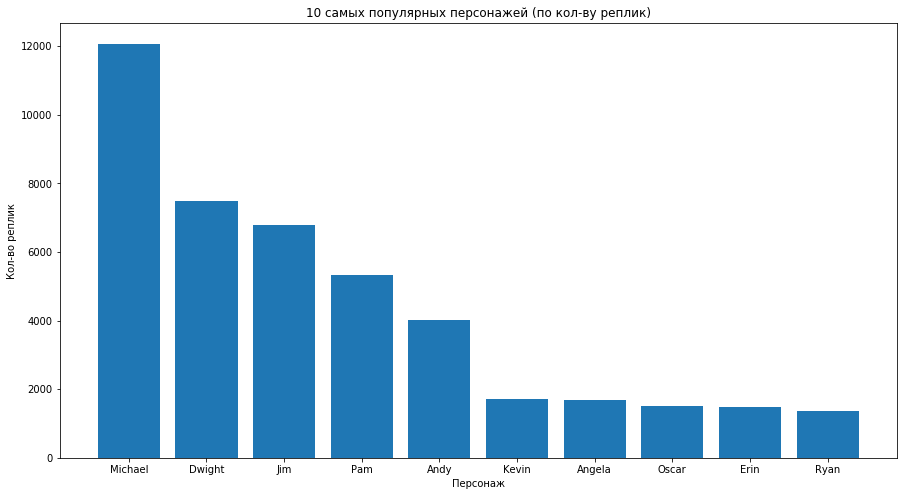

In [8]:
plt.figure(figsize=(15, 8))
X = df2[0]
Y = df2[1].apply(int)
plt.bar(X, Y)
plt.xlabel('Персонаж')
plt.ylabel('Кол-во реплик')
plt.title('10 самых популярных персонажей (по кол-ву реплик)');

In [9]:
speak = list(data['SPEAKER'])
replica = list(data['UTTERANCE'])

In [10]:
text = ''
for i in tqdm(range(len(speak))):
    text += speak[i] + ' ' + replica[i] + ' '

In [11]:
for punct in punctuation: #убрала пунктуацию
    text = text.replace(punct, '')
tokens = nltk.word_tokenize(text)

In [12]:
normal_form_l = []

for i in tqdm(tokens):
    ana = morph.parse(i) 
    ana_f = ana[0] 
    normal_form_l.append(ana_f.normal_form)

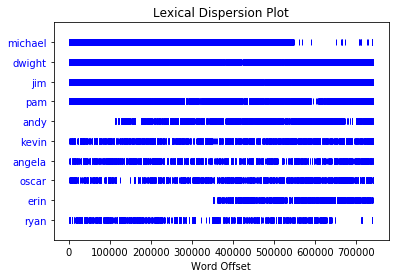

In [13]:
names = ['michael', 'dwight', 'jim', 'pam', 'andy', 
         'kevin', 'angela', 'oscar', 'erin', 'ryan']
lemd = nltk.Text(normal_form_l)
lemd.dispersion_plot(names)

In [14]:
replics = list(data['UTTERANCE'])

In [15]:
line = r"that's what she said"
new_r = []
last = []

for rep in replics:
    rep = rep.lower()
    new_r.append(rep)

for i in new_r:
    if line in i:
        i = i.replace(i, '1')
        last.append(int(i))
    else:
        i = i.replace(i, '0')
        last.append(int(i))

In [16]:
for_df = {}
for_df['name'] = speakers
for_df['num'] = last
df4 = pd.DataFrame(for_df)
df4 = df4.groupby('name').sum()
df4 = df4.sort_values(by=['num','name'])
df4 = df4.tail(10)
df4

,num
name,
Creed,1
Everyone,1
Holly,1
Jan,1
Pam,1
Stanley,1
David,2
Dwight,2
Jim,2


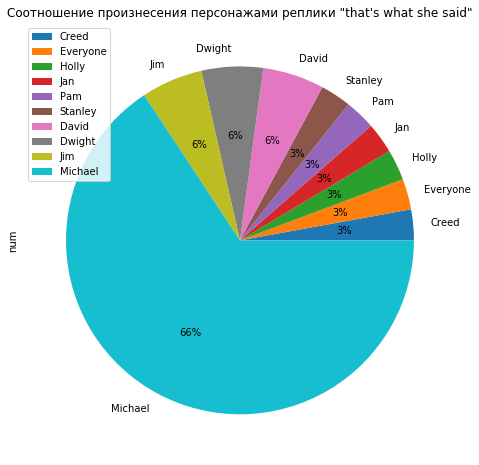

In [17]:
df4.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.0f%%')
plt.title('''Соотношение произнесения персонажами реплики "that's what she said"''')
plt.show()

In [18]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))

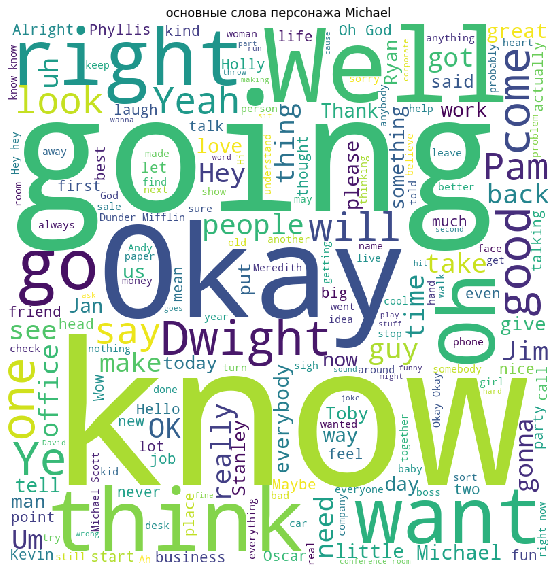

In [19]:
data1 = data[data['SPEAKER'] == 'Michael']
text1 = ' '.join([word for word in data1['UTTERANCE'].values if word not in stops])
    
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text1)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('основные слова персонажа Michael')
plt.show()

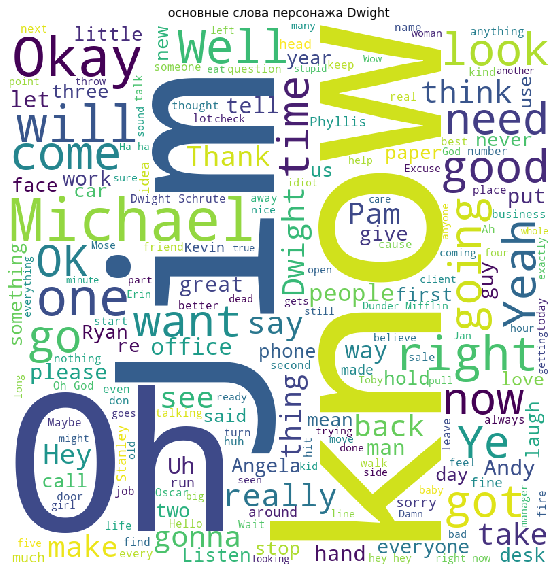

In [20]:
data2 = data[data['SPEAKER'] == 'Dwight']
text2 = ' '.join([word for word in data2['UTTERANCE'].values if word not in stops])
    
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text2)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('основные слова персонажа Dwight')
plt.show()

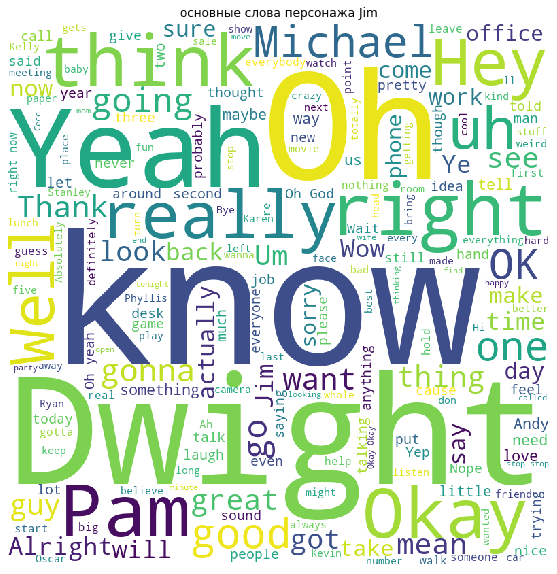

In [21]:
data3 = data[data['SPEAKER'] == 'Jim']
text3 = ' '.join([word for word in data3['UTTERANCE'].values if word not in stops])
    
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text3)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('основные слова персонажа Jim')
plt.show()

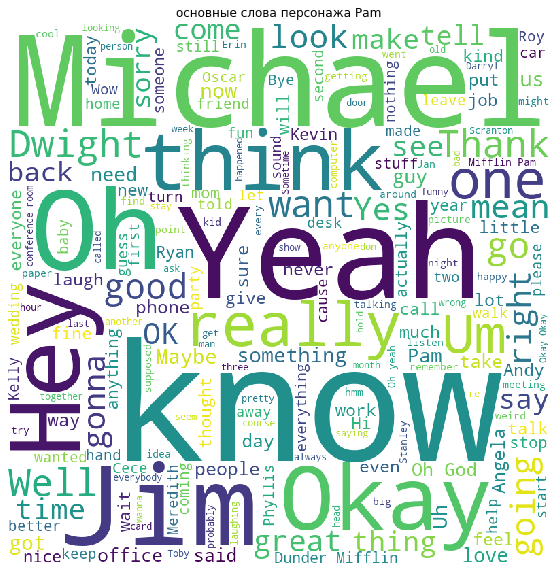

In [22]:
data4 = data[data['SPEAKER'] == 'Pam']
text4 = ' '.join([word for word in data4['UTTERANCE'].values if word not in stops])
    
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text4)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('основные слова персонажа Pam')
plt.show()

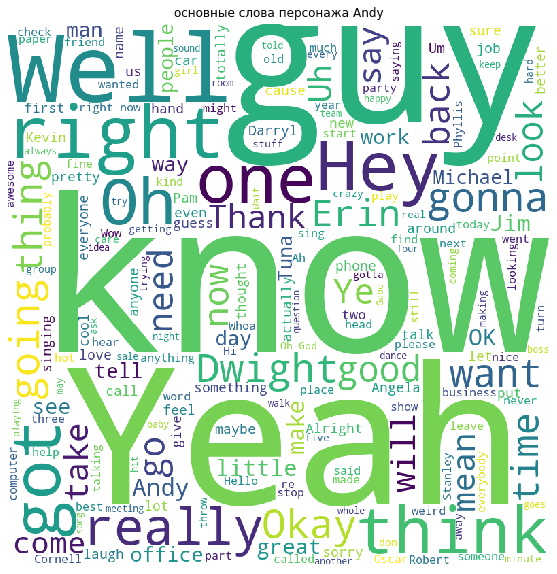

In [23]:
data5 = data[data['SPEAKER'] == 'Andy']
text5 = ' '.join([word for word in data5['UTTERANCE'].values if word not in stops])
    
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text5)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('основные слова персонажа Andy')
plt.show()

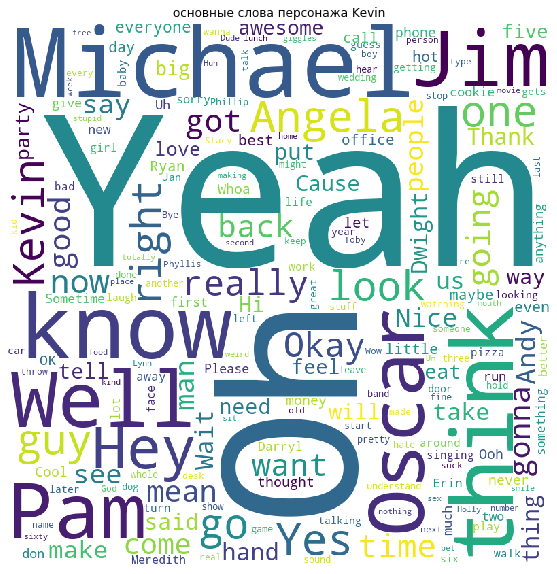

In [24]:
data6 = data[data['SPEAKER'] == 'Kevin']
text6 = ' '.join([word for word in data6['UTTERANCE'].values if word not in stops])

wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text6)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('основные слова персонажа Kevin')
plt.show()

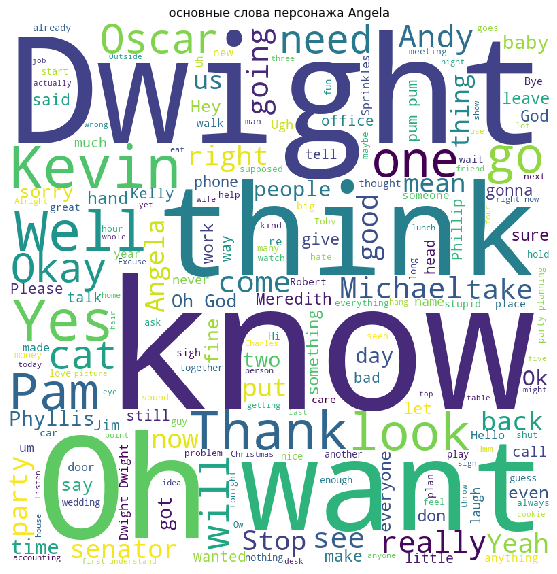

In [25]:
data7 = data[data['SPEAKER'] == 'Angela']
text7 = ' '.join([word for word in data7['UTTERANCE'].values if word not in stops])
    
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text7)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('основные слова персонажа Angela')
plt.show()

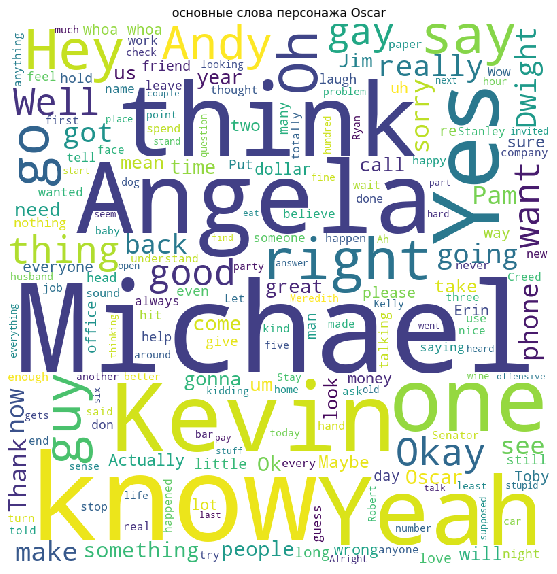

In [26]:
data8 = data[data['SPEAKER'] == 'Oscar']
text8 = ' '.join([word for word in data8['UTTERANCE'].values if word not in stops])
    
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text8)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('основные слова персонажа Oscar')
plt.show()

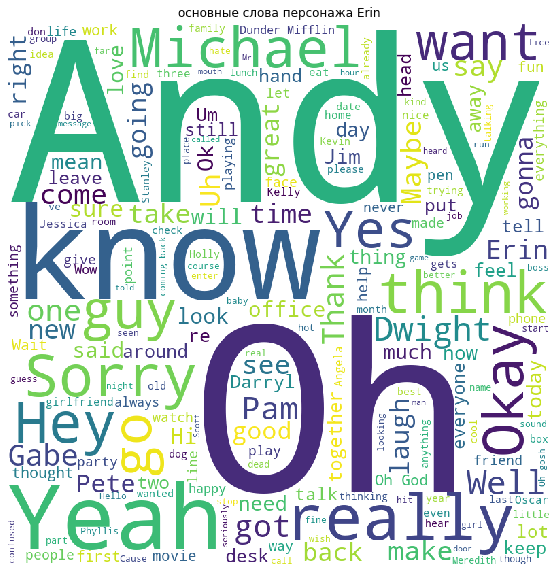

In [27]:
data9 = data[data['SPEAKER'] == 'Erin']
text9 = ' '.join([word for word in data9['UTTERANCE'].values if word not in stops])

wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text9)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('основные слова персонажа Erin')
plt.show()

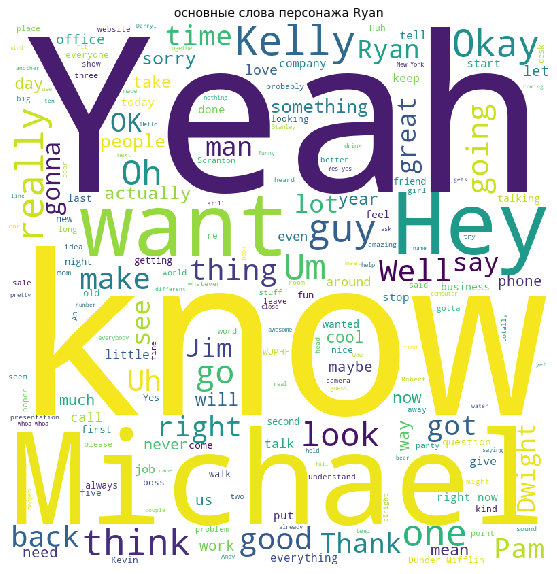

In [28]:
data10 = data[data['SPEAKER'] == 'Ryan']
text10 = ' '.join([word for word in data10['UTTERANCE'].values if word not in stops])
    
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text10)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('основные слова персонажа Ryan')
plt.show()